In [1]:
import tensorflow as tf

D:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from tensorflow.keras import datasets,layers,models

In [5]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 229s 1us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape


(10000, 32, 32, 3)

In [8]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

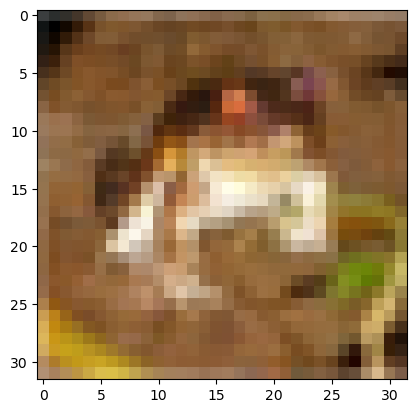

In [9]:
plt.imshow(X_train[0])

In [10]:
plt.figure(figsize=(15,2))

<Figure size 1500x200 with 0 Axes>

<Figure size 1500x200 with 0 Axes>

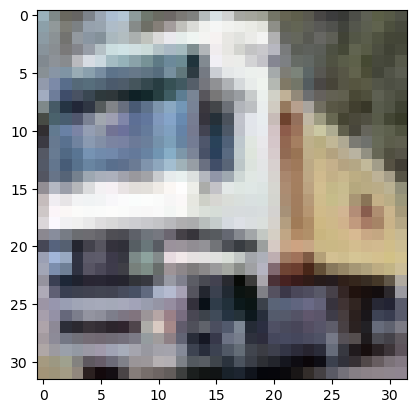

In [11]:
plt.imshow(X_train[1])

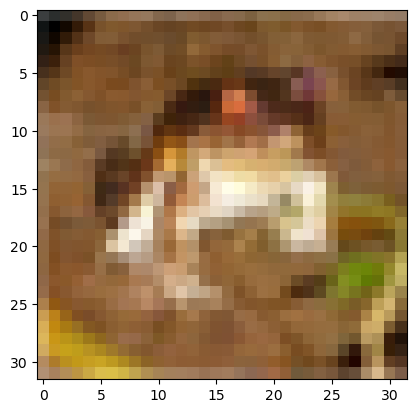

In [12]:
plt.imshow(X_train[0])

In [13]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
y_train=y_train.reshape(-1, )

In [17]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [18]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

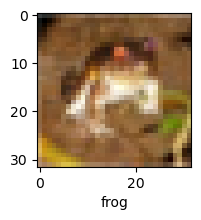

In [19]:
plot_sample(X_train,y_train,0)

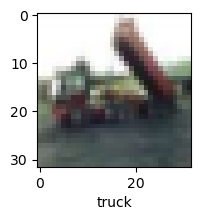

In [20]:
plot_sample(X_train,y_train,2)

In [21]:
X_train[0]=X_train[0]/255

In [22]:
X_train[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

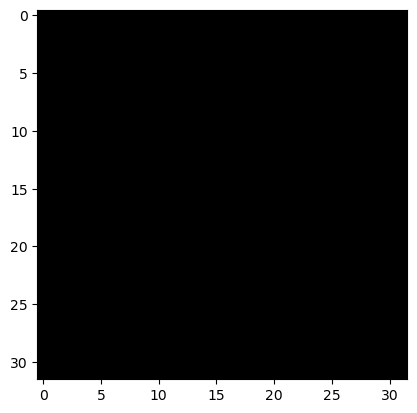

In [23]:
plt.imshow(X_train[0])

In [24]:
X_train=X_train/255

In [25]:
X_test=X_test/255

In [27]:
ann=models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                       layers.Dense(3000,activation='relu'),
                       layers.Dense(100,activation='relu'),
                       layers.Dense(10,activation='sigmoid')])

In [29]:
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.4208 - accuracy: 0.4963
Epoch 2/5
1563/1563 [==============================] - 59s 37ms/step - loss: 1.3858 - accuracy: 0.5109
Epoch 3/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.3520 - accuracy: 0.5238
Epoch 4/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.3202 - accuracy: 0.5326
Epoch 5/5
1563/1563 [==============================] - 60s 39ms/step - loss: 1.2908 - accuracy: 0.5457


In [34]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.3954 - accuracy: 0.5017


[1.3954133987426758, 0.5016999840736389]

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

In [33]:
import numpy as np

In [49]:
y_pred=ann.predict(X_test)

In [50]:
y_pred

array([[0.2132341 , 0.48029682, 0.5553998 , ..., 0.06391656, 0.4833639 ,
        0.10862631],
       [0.7676721 , 0.97120154, 0.1228165 , ..., 0.04494128, 0.95348835,
        0.98035824],
       [0.93705726, 0.91210735, 0.34008306, ..., 0.1586794 , 0.9664034 ,
        0.877788  ],
       ...,
       [0.06891468, 0.05789787, 0.7850902 , ..., 0.47287077, 0.14742306,
        0.10221377],
       [0.19779569, 0.4025085 , 0.6293628 , ..., 0.34952587, 0.06924176,
        0.24021316],
       [0.47766596, 0.16830686, 0.6593954 , ..., 0.9224604 , 0.15463427,
        0.3636862 ]], dtype=float32)

In [52]:
y_pred_classes=[np.argmax(element) for element in y_pred]

In [87]:
print("classification report\n",classification_report(y_test,y_pred_classes))

classification report
               precision    recall  f1-score   support

           0       0.48      0.62      0.54      1000
           1       0.53      0.69      0.60      1000
           2       0.36      0.33      0.34      1000
           3       0.32      0.46      0.38      1000
           4       0.37      0.48      0.42      1000
           5       0.49      0.17      0.25      1000
           6       0.56      0.45      0.50      1000
           7       0.51      0.58      0.54      1000
           8       0.63      0.54      0.58      1000
           9       0.66      0.41      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.47     10000
weighted avg       0.49      0.47      0.47     10000



In [53]:
y_pred_classes

[3,
 9,
 8,
 8,
 4,
 6,
 3,
 4,
 5,
 1,
 8,
 9,
 1,
 7,
 1,
 8,
 5,
 3,
 8,
 6,
 9,
 0,
 0,
 1,
 4,
 6,
 3,
 0,
 1,
 6,
 6,
 4,
 4,
 5,
 9,
 1,
 6,
 9,
 9,
 5,
 0,
 6,
 9,
 3,
 9,
 9,
 3,
 8,
 4,
 6,
 9,
 8,
 6,
 3,
 8,
 8,
 5,
 1,
 3,
 4,
 7,
 3,
 1,
 9,
 6,
 2,
 1,
 2,
 3,
 9,
 2,
 7,
 8,
 8,
 0,
 2,
 9,
 3,
 3,
 1,
 8,
 1,
 1,
 0,
 2,
 7,
 2,
 8,
 8,
 9,
 9,
 4,
 8,
 6,
 4,
 5,
 4,
 0,
 2,
 7,
 7,
 7,
 6,
 3,
 1,
 1,
 5,
 6,
 8,
 5,
 6,
 2,
 6,
 4,
 1,
 1,
 0,
 9,
 2,
 5,
 8,
 4,
 1,
 2,
 0,
 1,
 8,
 5,
 3,
 0,
 4,
 1,
 9,
 9,
 1,
 3,
 9,
 7,
 2,
 8,
 2,
 1,
 3,
 5,
 1,
 7,
 6,
 5,
 5,
 5,
 9,
 9,
 8,
 8,
 0,
 5,
 2,
 9,
 3,
 0,
 0,
 1,
 5,
 4,
 9,
 7,
 8,
 4,
 7,
 0,
 9,
 7,
 1,
 8,
 9,
 9,
 0,
 5,
 3,
 9,
 9,
 7,
 6,
 2,
 5,
 8,
 6,
 3,
 7,
 0,
 2,
 3,
 5,
 1,
 7,
 2,
 8,
 2,
 7,
 8,
 5,
 9,
 0,
 7,
 1,
 5,
 8,
 4,
 7,
 8,
 5,
 1,
 3,
 7,
 9,
 5,
 1,
 9,
 0,
 7,
 7,
 3,
 9,
 3,
 9,
 9,
 9,
 2,
 3,
 3,
 3,
 1,
 1,
 1,
 8,
 0,
 4,
 0,
 6,
 5,
 1,
 1,
 7,
 9,
 0,
 3,
 7,
 0,
 5,
 1,


In [88]:
cnn=models.Sequential([
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                       layers.MaxPooling2D((2,2)),
                       layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                       layers.MaxPooling2D((2,2)),                    
                       layers.Flatten(),
                       layers.Dense(64,activation='relu'),
                       layers.Dense(10,activation='softmax')])

In [89]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [90]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.6619 - accuracy: 0.3966
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.1217 - accuracy: 0.6106
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9620 - accuracy: 0.6622
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8545 - accuracy: 0.7032
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7752 - accuracy: 0.7297
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7138 - accuracy: 0.7505
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6663 - accuracy: 0.7683
Epoch 8/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6155 - accuracy: 0.7850
Epoch 9/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5694 - accuracy: 0.8014
Epoch 10/10
1563/1563 [==============================] - 27s 17m

In [91]:
y_test=y_test.reshape(-1,)

In [92]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [93]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

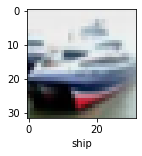

In [44]:
plot_sample(X_test,y_test,1)

In [45]:
y_pred=cnn.predict(X_test)

In [46]:
y_pred[:5]

array([[6.7504332e-04, 3.3050117e-05, 7.0934545e-04, 8.6699110e-01,
        3.9770282e-04, 3.4174528e-02, 9.6841402e-02, 2.5192430e-05,
        8.3646024e-05, 6.9032561e-05],
       [2.6457998e-04, 3.2099306e-03, 1.7123007e-07, 7.7913462e-09,
        3.1382046e-09, 1.3420283e-10, 5.8180336e-09, 5.0128426e-11,
        9.9618274e-01, 3.4251472e-04],
       [1.8123345e-01, 4.7147852e-01, 6.5717229e-04, 3.1986838e-04,
        3.6361024e-03, 9.8039243e-05, 3.2782617e-03, 1.9779972e-04,
        3.2356581e-01, 1.5535072e-02],
       [8.0925953e-01, 1.0548847e-02, 7.5946801e-04, 1.8529594e-03,
        1.5003282e-03, 2.6077003e-05, 1.9888586e-04, 2.3967893e-06,
        1.7357424e-01, 2.2773440e-03],
       [3.8516199e-09, 9.2675486e-07, 1.7660233e-03, 5.8556381e-03,
        9.5323986e-01, 8.1763498e-04, 3.8317122e-02, 1.7647907e-06,
        7.5997224e-07, 1.1449490e-07]], dtype=float32)

In [47]:
y_classes=[np.argmax(element) for element in y_pred]

In [48]:
y_classes[:5]

[3, 8, 1, 0, 4]

In [49]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

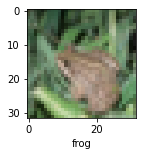

In [50]:
plot_sample(X_test,y_test,4)

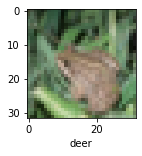

In [51]:
plot_sample(X_test,y_classes,4)

In [52]:
#now the classification report

In [53]:
print("Classification Report\n",classification_report(y_test,y_classes))

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.67      0.73      1000
           1       0.88      0.74      0.80      1000
           2       0.57      0.61      0.59      1000
           3       0.50      0.55      0.53      1000
           4       0.65      0.71      0.68      1000
           5       0.64      0.58      0.61      1000
           6       0.78      0.78      0.78      1000
           7       0.75      0.76      0.75      1000
           8       0.77      0.84      0.81      1000
           9       0.77      0.80      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.71     10000
weighted avg       0.71      0.70      0.71     10000

